In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

In [16]:
df_train = pd.read_csv(r"regression/train_reg.csv")

In [17]:
X = df_train['x']
y = df_train['y']
x = X - X.mean()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,16.197,0.172,15.87,16.510,0.002,0.001,11242.0,5922.0,1.0
β,3.081,0.049,2.99,3.172,0.000,0.000,12717.0,6296.0,1.0
ε,1.697,0.125,1.48,1.940,0.001,0.001,11836.0,6197.0,1.0


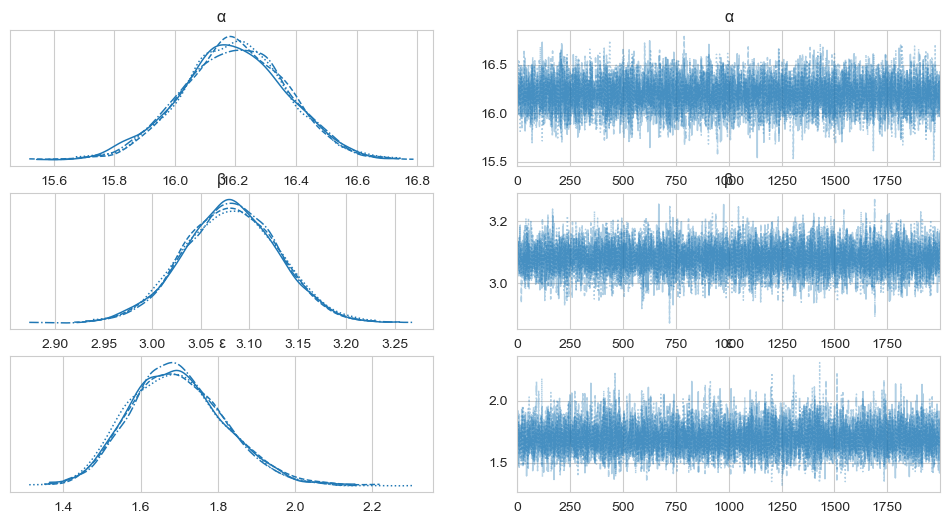

In [18]:
with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * x)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_g = pm.sample(2000, tune=2000, chains=4, cores=4)

az.plot_trace(trace_g, var_names=['α', 'β', 'ε']);
az.summary(trace_g).head(3)

In [19]:
pm.sample_posterior_predictive(trace_g, model=model_g, random_seed=42, extend_inferencedata=True)

Sampling: [y_pred]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

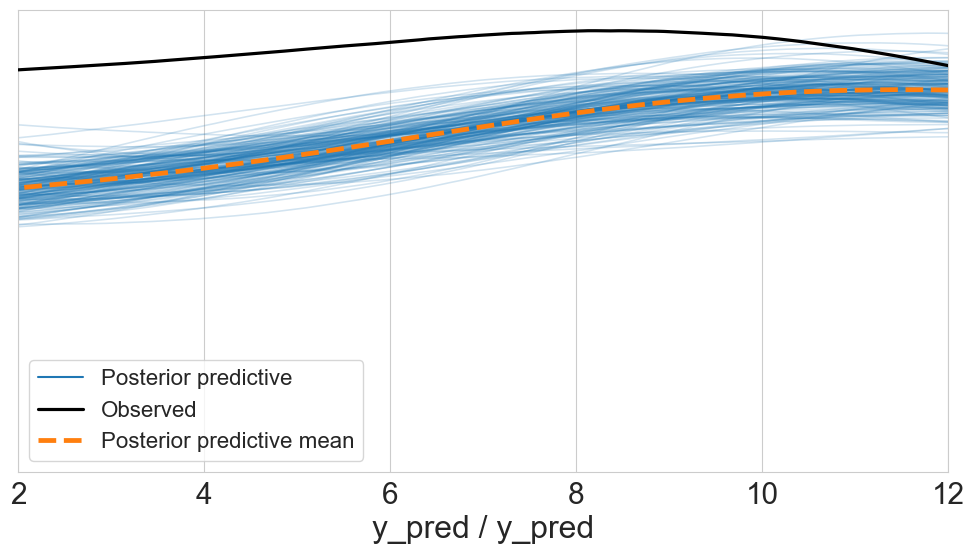

In [20]:
ax = az.plot_ppc(trace_g, num_pp_samples=200, figsize=(12, 6), mean=True)
plt.xlim(2, 12);

In [21]:
a = az.summary(trace_g).head(3)[:1].mean()[:1].item()
b = az.summary(trace_g).head(3)[1:2].mean()[:1].item()

In [22]:
df_test = pd.read_csv(r"regression/test_reg.csv")

In [23]:
X_test = df_test['x']

In [24]:
y_pred = a + b*X_test

In [25]:
y_pred

0     34.417227
1     24.386251
2     14.144318
3     46.672059
4     38.454832
        ...    
95    44.522478
96    48.811758
97    21.880528
98    17.854289
99    35.935198
Name: x, Length: 100, dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred)

294.2207228215833